## Importing Pandas

In [1]:
import pandas as pd

In [2]:
naira_rate = pd.read_csv('exchange05082023.csv')

## viewing the first few rows

In [3]:
naira_rate.head(10)
print(naira_rate.describe())
print(naira_rate.info())

         Rate Year  Buying Rate  Central Rate  Selling Rate
count  5295.000000  5295.000000   5295.000000   5295.000000
mean   2012.267611   214.453896    215.210633    215.500479
std       6.245237   112.864427    113.965834    112.836876
min    2001.000000    15.590000     66.090000    112.850000
25%    2007.000000   131.800000    132.300000    132.800000
50%    2012.000000   154.740000    155.240000    155.740000
75%    2018.000000   304.950000    305.450000    305.950000
max    2023.000000   789.510000   1376.800000    790.510000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rate Date     5295 non-null   object 
 1   Currency      5295 non-null   object 
 2   Rate Year     5295 non-null   int64  
 3   Rate Month    5295 non-null   object 
 4   Buying Rate   5295 non-null   float64
 5   Central Rate  5295 non-null   float64
 6   Selli

##### The summary seem to show an abnormal value (outlier) in the max value returned

## Investigating the outlier

In [4]:
print(naira_rate.min())
print(naira_rate.max())
naira_rate[naira_rate['Central Rate'] > 1000]

Rate Date       1/10/2002
Currency        US DOLLAR
Rate Year            2001
Rate Month              8
Buying Rate         15.59
Central Rate        66.09
Selling Rate       112.85
dtype: object
Rate Date         9/9/2022
Currency        US DOLLAR 
Rate Year             2023
Rate Month       September
Buying Rate         789.51
Central Rate        1376.8
Selling Rate        790.51
dtype: object


,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
4804,12/9/2003,US DOLLAR,2003,December,136.3,1376.8,137.3


##### The outlier willbe dealt with later in the cleaning process

## Dropping the blank columns

In [5]:
#naira_rate.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], inplace=True)

## Converting the date column to date format

In [6]:
naira_rate['Rate Date'] = pd.to_datetime(naira_rate['Rate Date']).dt.date
naira_rate

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2023-08-04,US DOLLAR,2023,August,749.615,750.115,750.615
1,2023-08-03,US DOLLAR,2023,August,765.949,766.449,766.949
2,2023-08-02,US DOLLAR,2023,August,740.665,741.165,741.665
3,2023-08-01,US DOLLAR,2023,August,774.855,775.355,775.855
4,2023-07-31,US DOLLAR,2023,July,757.022,757.522,758.022
...,...,...,...,...,...,...,...
5290,2001-12-13,US DOLLAR,2001,December,111.850,112.350,112.850
5291,2001-12-12,US DOLLAR,2001,December,111.850,112.350,112.850
5292,2001-12-11,US DOLLAR,2001,December,111.850,112.350,112.850
5293,2001-12-10,US DOLLAR,2001,December,111.850,112.350,112.850


## Converting the columns to lower case

In [7]:
naira_rate.columns = naira_rate.columns.map(str.lower)
naira_rate.columns = naira_rate.columns.str.replace(' ', '_')

## Filtering the dataset to include only US Dollar rates and correcting the outlier values 

In [8]:
naira_us_rate = naira_rate[naira_rate['currency'] == 'US DOLLAR'].reset_index().drop(columns=['currency', 'index'])
naira_us_rate['central_rate'].min()
naira_us_rate[naira_us_rate['central_rate'] > 1000]
naira_us_rate.iloc[4804, 4] = 136.8
naira_us_rate[naira_us_rate['central_rate'] < 100]
naira_us_rate.iloc[3674:3680]
naira_us_rate.iloc[3676, 4] = 116.09
naira_us_rate.iloc[3904, 4] = 124.52



## Segmenting by president tenures

In [9]:
Obasanjo = naira_us_rate[naira_us_rate['rate_date'] < pd.to_datetime('2007-05-29')].sort_values(by='rate_date').reset_index()
Yar_Adua = naira_us_rate[(naira_us_rate['rate_date'] >= pd.to_datetime('2007-05-29')) & (naira_us_rate['rate_date'] < pd.to_datetime('2010-05-06'))].sort_values(by='rate_date').reset_index()
Jonathan = naira_us_rate[(naira_us_rate['rate_date'] >= pd.to_datetime('2010-05-06')) & (naira_us_rate['rate_date'] < pd.to_datetime('2015-05-29'))].sort_values(by='rate_date').reset_index()
Buhari = naira_us_rate[(naira_us_rate['rate_date'] >= pd.to_datetime('2015-05-09')) & (naira_us_rate['rate_date'] < pd.to_datetime('2023-05-29'))].sort_values(by='rate_date').reset_index()
Tinubu = naira_us_rate[naira_us_rate['rate_date'] >= pd.to_datetime('2023-05-29')].reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_14592\3288208942.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Obasanjo = naira_us_rate[naira_us_rate['rate_date'] < pd.to_datetime('2007-05-29')].sort_values(by='rate_date').reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\3288208942.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Yar_Adua = naira_us_rate[(naira_us_rate['rate_date'] >= pd.to_datetime('2007-05-29')) & (naira_us_rate['rate_date'] < pd.to_datetime('2010-05-06'))].sort_values(by='rate_date').reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\32882089

## Calculating the rolling mean to smoothen the chart

In [10]:
Obasanjo['rolling_mean'] = Obasanjo['central_rate'].rolling(30).mean()
Yar_Adua['rolling_mean'] = Yar_Adua['central_rate'].rolling(30).mean()
Jonathan['rolling_mean'] = Jonathan['central_rate'].rolling(30).mean()
Buhari['rolling_mean'] = Buhari['central_rate'].rolling(30).mean()
Tinubu['rolling_mean'] = Tinubu['central_rate'].rolling(30).mean()

## Visualizing the result

C:\Users\USER\AppData\Local\Temp\ipykernel_14592\1631315213.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), alpha=0.3, fontsize= 22)
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\1631315213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), alpha=0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\1631315213.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, alpha=0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\1631315213.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), alpha=0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_14592\1631315213.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabe

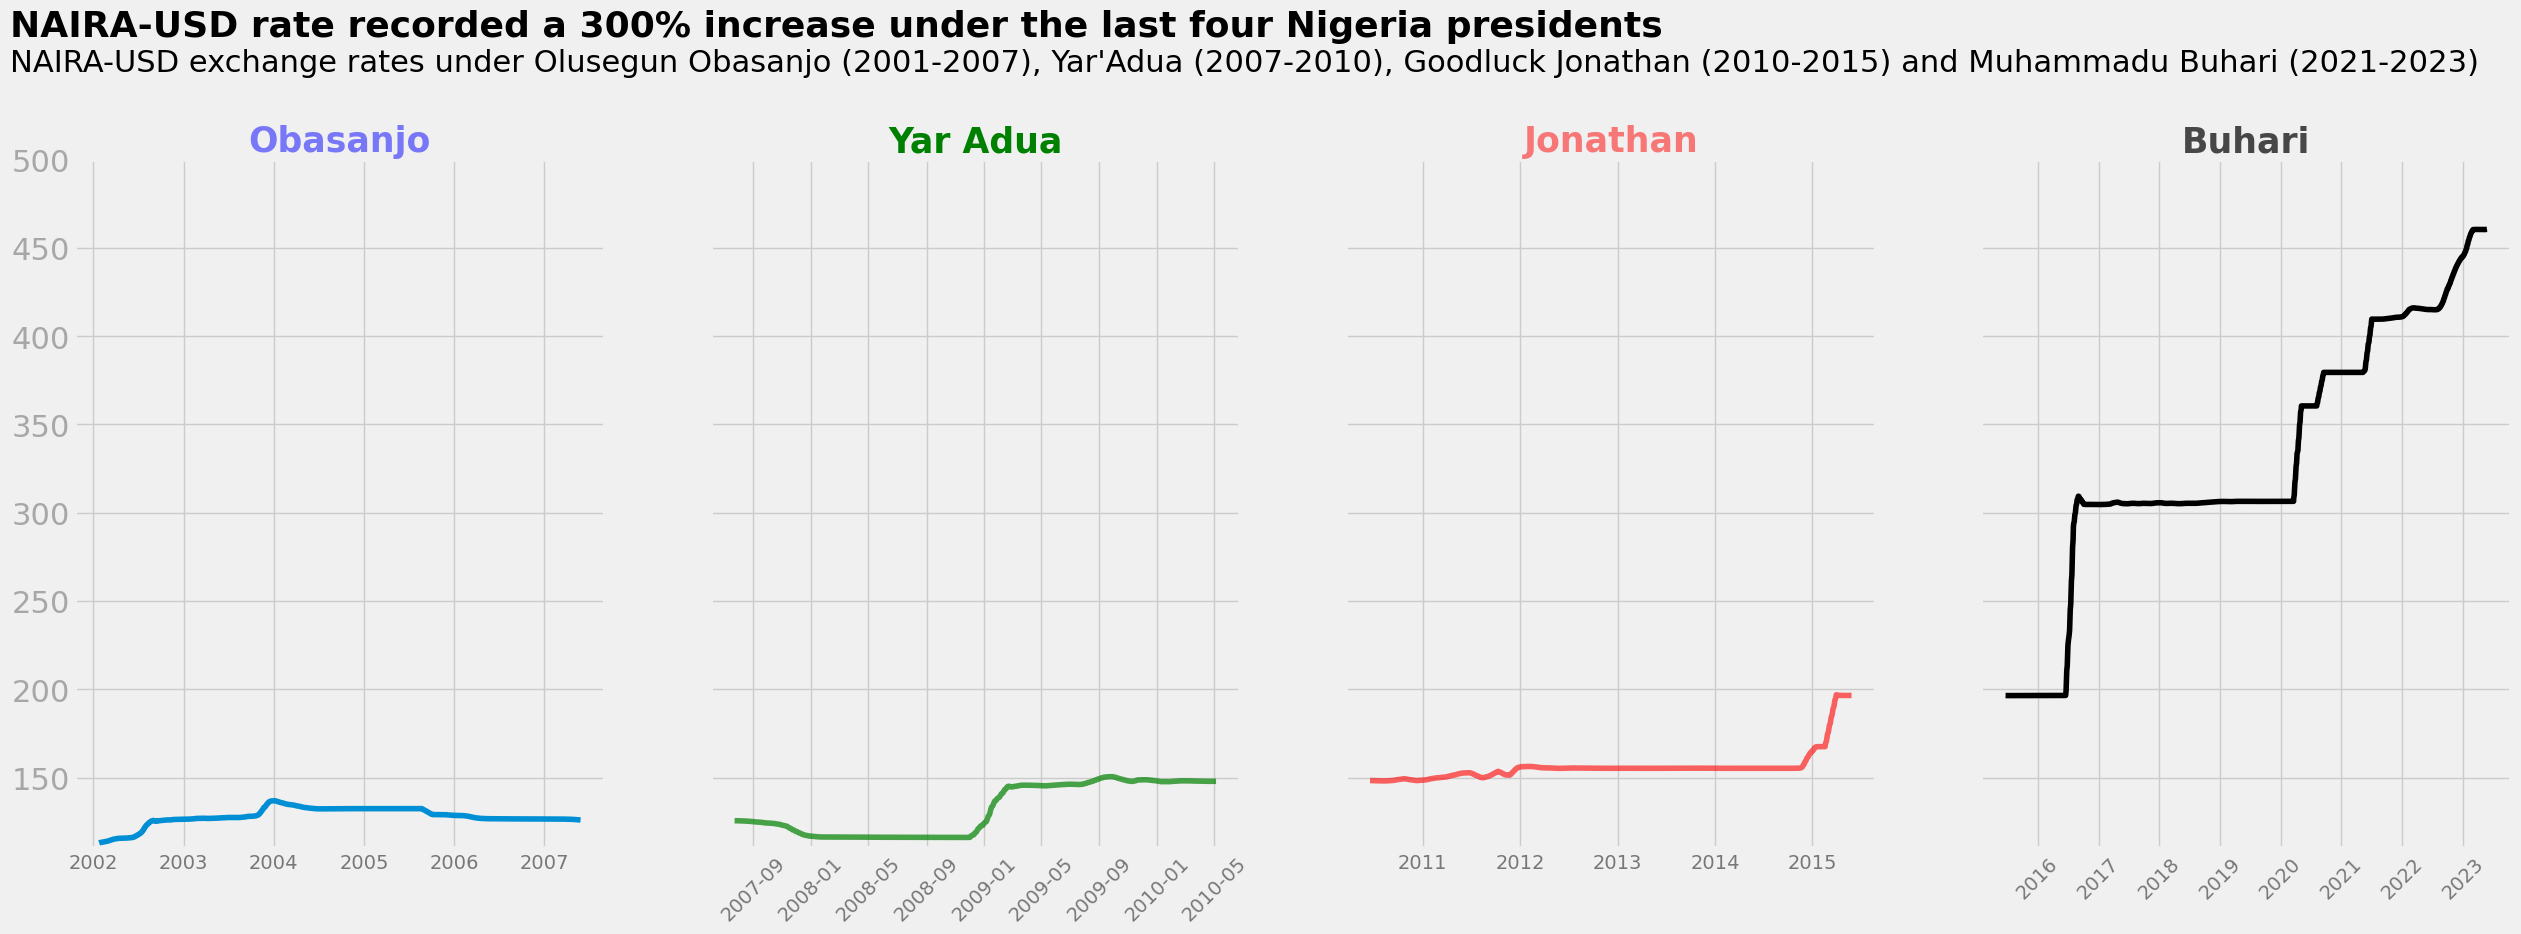

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

style.use('fivethirtyeight')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(28,8.5))
ax1.plot(Obasanjo['rate_date'], Obasanjo['rolling_mean'])
ax1.set_ylim(110, 500)
ax1.set_title('Obasanjo', color='blue', alpha=0.5, fontsize=25, weight='bold')
ax1.set_yticklabels(ax1.get_yticklabels(), alpha=0.3, fontsize= 22)
ax1.set_xticklabels(ax1.get_xticklabels(), alpha=0.5)


ax2.plot(Yar_Adua['rate_date'], Yar_Adua['rolling_mean'], color='green', alpha=0.7)
ax2.set_ylim(110, 500)
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, alpha=0.5)
ax2.set_title('Yar Adua', color='green', fontsize=25, weight='bold')

ax3.plot(Jonathan['rate_date'], Jonathan['rolling_mean'], color='red', alpha=0.6)
ax3.set_ylim(110, 500)
ax3.set_yticklabels([])
ax3.set_xticklabels(ax3.get_xticklabels(), alpha=0.5)
ax3.set_title('Jonathan', color='red', alpha=0.5, fontsize=25, weight='bold')

ax4.plot(Buhari['rate_date'], Buhari['rolling_mean'], color='black')
ax4.set_ylim(110, 500)
ax4.set_yticklabels([])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, alpha=0.5)
ax4.set_title('Buhari', color='black', alpha=0.7, fontsize=25, weight='bold')
ax1.text(11350, 570.0, 'NAIRA-USD rate recorded a 300% increase under the last four Nigeria presidents',
         fontsize=26, weight='bold')
ax1.text(11350, 550.0, '''NAIRA-USD exchange rates under Olusegun Obasanjo (2001-2007), Yar'Adua (2007-2010), Goodluck Jonathan (2010-2015) and Muhammadu Buhari (2021-2023)''',
        fontsize=22)

plt.show()

## Visualizing the chart from 2001 till date

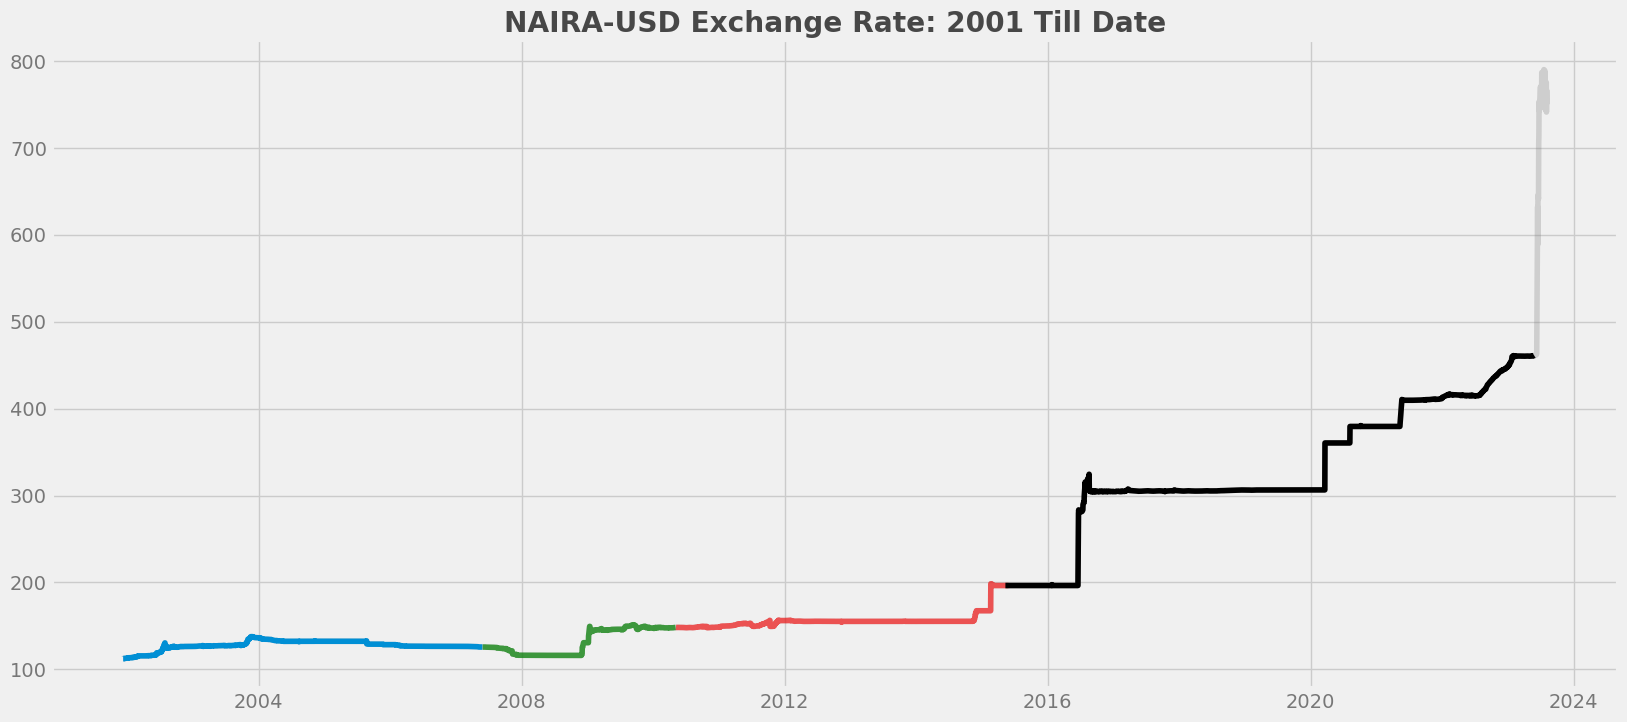

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(naira_us_rate['rate_date'], naira_us_rate['central_rate'], color='grey', alpha=0.3)
plt.yticks(alpha=0.5)
plt.xticks(alpha=0.5)
plt.plot(Obasanjo['rate_date'], Obasanjo['central_rate'])
plt.plot(Yar_Adua['rate_date'], Yar_Adua['central_rate'], color='green', alpha=0.7)
plt.plot(Jonathan['rate_date'], Jonathan['central_rate'], color='red', alpha=0.6)
plt.plot(Buhari['rate_date'], Buhari['central_rate'], color='black')
plt.title('NAIRA-USD Exchange Rate: 2001 Till Date', weight='bold', alpha=0.7)
plt.show()

In [22]:
print((Obasanjo['central_rate'].iloc[0]) -Obasanjo['central_rate'].mean())
print((Yar_Adua['central_rate'].iloc[0]) - Yar_Adua['central_rate'].mean())
print((Jonathan['central_rate'].iloc[0]) - Jonathan['central_rate'].mean())
print((Buhari['central_rate'].iloc[0]) - Buhari['central_rate'].mean())

-15.460845175766636
-6.270351617440227
-8.214919678714864
-133.61473467005072


## Conclusion

The Naira has only gone one direction since the time of President Olusegun Obasanjo and that is upwards. Although, the naira on very few ocassions in the past record some gains against the dollar, it is almost always immediately followed by an upward trend.

In summary the following is how the past presidents have been able to sustain the value of the Naira against the dollar during their tenures:
| President | Average change in naira |
|:-----------|---------------------:|
| Obasanjo   |                 -15 |
| Yar'Adua   |                  -6 |
| Jonathan   |                  -8 |
| Buhari     |                -134 |

According to the stats Yar'Adua's tenure seems to have had the most stability which is closely followed by Jonathan's, while Buhari's tenure have seen the highest surge in the value of the Naira to the Dollar.

Empirically, there is enough evidence to predict that there will be a continued surge in the trend of the Naira to dollar. The Naira has continuously risen since the Obasanjo era and does not look like it would make a change in the foreseeable future with Tinubu Era continuing the trend.

## Recommendation

I have always been excited about finding this dataset that explains the value of the naira against the dollar at different periods in time. Finally, I am happy that I have been able to achieve this goal. 

A part of taking this work further is to use the most applicable machine learning methods to predict the future value of the naira.

Lastly, a story can be told about how the Naira has been affected by fared different major political and economic event that have happened over the years.